In [106]:
datadir = 'data'
!ls $datadir*

final_clean_data.py         yield_final.csv
final_save_histogram.py     yield_final_highquality.csv
locations_final.csv


In [107]:
import numpy as np
import pandas as pd
import pylab as plt
from sys import path; path.append(datadir)
import seaborn as sns; sns.set()

In [115]:
Y = pd.read_csv("./data/yield_final.csv",names=['year','loc1','loc2','yield'])

In [116]:
Y['loc'] = Y['loc1'].apply(str) + '_' + Y['loc2'].apply(str)

In [117]:
Y.shape

(20954, 5)

In [118]:
Y.head()

,year,loc1,loc2,yield,loc
0,2015,1,47,29.7,1_47
1,2015,1,65,35.2,1_65
2,2015,1,85,28.0,1_85
3,2015,1,105,27.7,1_105
4,2015,1,119,29.6,1_119


In [119]:
year = sorted(Y['year'].unique())

In [120]:
num = []
for i in year:
    num.append(Y[Y['year']==i]['year'].count())

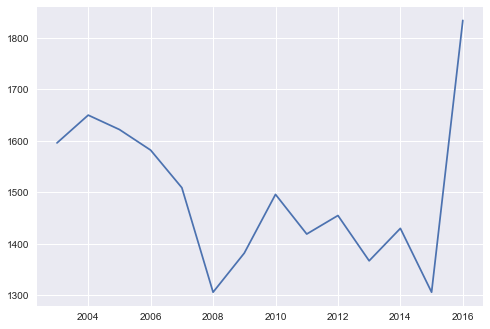

In [121]:
plt.plot(year, num)
plt.show()

In [143]:
L = pd.read_csv("./data/locations_final.csv", names=['loc1','loc2','lat','lon'])

In [144]:
L['loc'] = L['loc1'].apply(str) + '_' + L['loc2'].apply(str)

In [145]:
L.head()

,loc1,loc2,lat,lon,loc
0,1,47,-87.114,32.334,1_47
1,1,65,-87.623,32.753,1_65
2,1,85,-86.651,32.148,1_85
3,1,105,-87.294,32.639,1_105
4,1,119,-88.200,32.597,1_119


In [125]:
L['loc'].unique().shape

(1834,)

In [140]:
L[L['loc1'] == 1].shape

(50, 5)

<b>combine L and Y

In [127]:
combine = pd.merge(Y,L)

In [132]:
combine.tail()

,year,loc1,loc2,yield,loc,lat,lon
20949,2016,48,79,0.0,48_79,-102.83,33.608
20950,2003,48,107,32.1,48_107,-101.30,33.609
20951,2016,48,107,0.0,48_107,-101.30,33.609
20952,2003,48,303,29.1,48_303,-101.82,33.611
20953,2016,48,303,0.0,48_303,-101.82,33.611


<b>sample_data

In [146]:
L_sample = L[L['loc1'] == 1]

In [149]:
del L_sample['loc']

In [156]:
L_sample.shape

(50, 4)

In [152]:
L_sample.to_csv("./data/locations_final_sample.csv",index=False,header=False)